## Importing Libraries

In [4]:
import pandas as pd #data manipulation and ingestion
import numpy as np #multidimensional array computing
import sklearn #machine learning and predictive modeling
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #better data visualization
import os #directory change
os.chdir('/home/krishna/Desktop/Data Science/COMPETITIONS/Titanic/Data')
%matplotlib inline

## Exploratory Data Analysis

## 1) Data Loading

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.head() 
#train.tail() # to see bottom 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
""""The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead.
 The is the variable I am going to predict.

The other variables describe the passengers. They are the features.

PassengerId: id given to each traveler on the boat
Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
Name of the passeger
Sex
Age
SibSp: number of siblings and spouses traveling with the passenger
Parch: number of parents and children traveling with the passenger
ticket number
ticket Fare
cabin number
embarkation: This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q"""

'"The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he\'s dead.\n The is the variable I am going to predict.\n\nThe other variables describe the passengers. They are the features.\n\nPassengerId: id given to each traveler on the boat\nPclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)\nName of the passeger\nSex\nAge\nSibSp: number of siblings and spouses traveling with the passenger\nParch: number of parents and children traveling with the passenger\nticket number\nticket Fare\ncabin number\nembarkation: This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q'

## 2) Data pre-processing (Cleaning)

In [11]:
# TO remove missing values and do preprocssing we add the data together
total=pd.concat([train,test])

/home/krishna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [12]:
total.shape

(1309, 12)

In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
total['Age']= total['Age'].fillna(np.nanmedian(total['Age'])) 
total['Fare']= total['Fare'].fillna(np.nanmedian(total['Fare']))
#could also impute with the mean age but the median is more robust to outliers.

In [15]:
total['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
total['Embarked']=total['Embarked'].fillna('S')

In [17]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
total.describe() #statistical description of the numerical features

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.503186,33.281086,0.385027,655.000000,2.294882,0.498854,0.383838
std,12.905241,51.741500,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## Data Visualization

In [19]:
train.groupby('Sex').agg('sum')[['Survived', '1-train['Survived']']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

SyntaxError: invalid syntax (<ipython-input-19-026da16ffaad>, line 1)

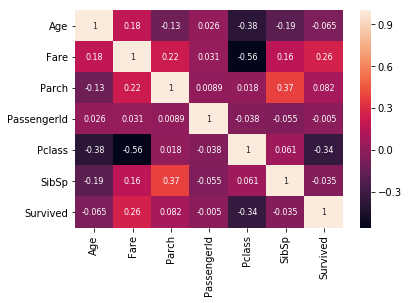

In [20]:
corr=total.corr()
sns.heatmap(corr,annot=True, annot_kws = { 'fontsize' : 8 })

In [21]:
total['Embarked']=total['Embarked'].replace({'S':0,'C':1,'Q':2})

In [22]:
total['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [23]:
total['Sex']=total['Sex'].replace({'male':0,'female':1})

In [24]:
total1=total.drop(['Cabin','Name','Survived','Ticket','PassengerId'],axis=1)

In [25]:
train1=total1.iloc[:891,:]
test1=total1.iloc[891:,:]
target1=train['Survived']

## Model Selection


In [26]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy= train_test_split(train1,target1,test_size=0.2,random_state=100,stratify=target1)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
modellr=LogisticRegression()
modellr.fit(trainx,trainy)
predlr=modellr.predict(testx)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(predlr,testy)

0.8100558659217877

In [29]:
predlr1=modellr.predict(test1)

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier(criterion='gini')
# model = tree.DecisionTreeRegressor()
modeldt.fit(trainx,trainy)

preddt=modeldt.predict(testx)

In [31]:
accuracy_score(preddt,testy)

0.7932960893854749

In [32]:
preddt1=modeldt.predict(test1)

## SVM (Support Vector Machine)

In [33]:
from sklearn.svm import SVC
modelsvm =SVC(gamma='scale')
#another format
#from sklearn import svm
#model = svm.SVC()
modelsvm.fit(trainx,trainy)
predsvm=modelsvm.predict(testx)

In [34]:
accuracy_score(predsvm,testy)

0.7039106145251397

In [35]:
predsvm1=modeldt.predict(test1)

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
modelnb.fit(trainx,trainy)
prednb=modelnb.predict(testx)

In [37]:
accuracy_score(prednb,testy)

0.8156424581005587

In [38]:
prednb1=modelnb.predict(test1)

## kNN (k- Nearest Neighbors)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier(n_neighbors=6)
modelknn.fit(trainx,trainy)
predknn=modelknn.predict(testx)

In [40]:
accuracy_score(predknn,testy)

0.6759776536312849

In [41]:
predknn1=modelknn.predict(test1)

## GBOOST

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier(n_estimators=45,learning_rate=.15,max_depth=1)
modelgb.fit(trainx,trainy)
predgb=modelgb.predict(testx)

In [43]:
accuracy_score(predgb,testy)

0.8268156424581006

In [44]:
predgb1=modelgb.predict(test1)

## XGBOOST


In [48]:
import xgboost
from xgboost import XGBClassifier

modelxg = XGBClassifier(n_estimators=1100, scale_pos_weight=1)
modelxg.fit(trainx , trainy)
predxg = modelxg.predict(testx)

In [49]:
accuracy_score(predxg,testy)

0.8603351955307262

In [50]:
predxg1=modelxg.predict(test1)

## Output

In [51]:
final=pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] =predlr1
final.to_csv('titanicLogisticRegression.csv', index=False)

In [52]:
final=pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] = predgb1
final.to_csv('titanicGradientBoost.csv', index=False)

In [53]:
final=pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] = predxg1
final.to_csv('titanicXGBoost.csv', index=False)